In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
oder_list = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name='OrderList')
oder_list.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


TypeError: no numeric data to plot

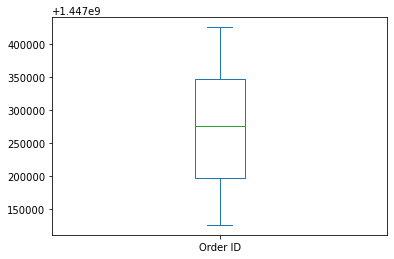

In [40]:
for col in oder_list.columns:
    oder_list[col].plot(kind='box')

<ipython-input-35-40f61ee4891a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = oder_list.corr()


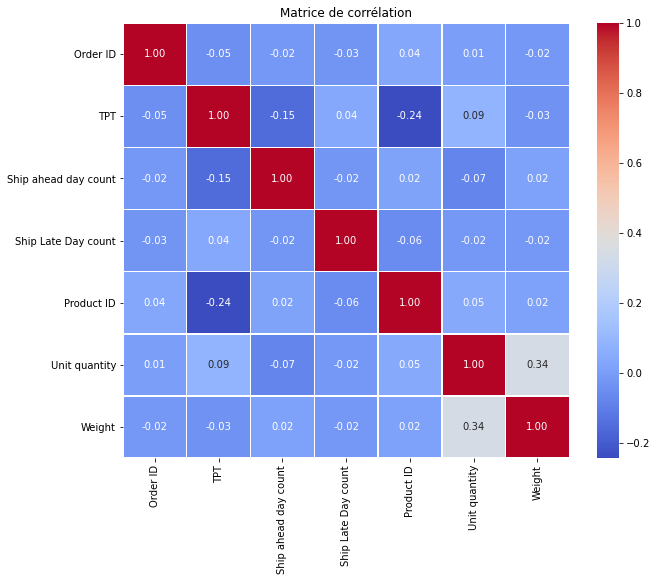

In [35]:
import seaborn as sns 

correlation_matrix = oder_list.corr()

# Afficher la heatmap avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
class DataFrameAnalyzerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("DataFrame Analyzer")

        # Frame pour les widgets
        self.frame = tk.Frame(root)
        self.frame.pack(padx=10, pady=10)

        # Bouton pour charger un fichier
        self.load_button = tk.Button(self.frame, text="Charger un fichier", command=self.load_file)
        self.load_button.grid(row=0, column=0, pady=(0, 10))

        # Liste des opérations disponibles
        self.operations = ["Statisques", "Valeur la plus fréquente", "Valeurs distinctes", "Valeurs manquantes", "Histogrammes", "box plots"]

        # Label, Checkbuttons, et Text pour chaque colonne
        self.column_labels = []
        self.column_checkbuttons = []
        self.column_results = []
        self.columns = []

        # Bouton pour exécuter les opérations
        self.analyze_button = tk.Button(self.frame, text="Analyser", command=self.analyze)
        self.analyze_button.grid(row=0, column=2, pady=(0, 10))

        # Bouton pour enregistrer les résultats
        self.save_button = tk.Button(self.frame, text="Enregistrer les résultats", command=self.save_results)
        self.save_button.grid(row=0, column=3, pady=(0, 10))

        # DataFrame pour stocker les résultats
        self.results_df = pd.DataFrame()

        # Fenêtre pour les histogrammes
        self.histogram_window = None
        self.histogram_canvas_frame = None
        self.histogram_row = 0

    def create_histogram_window(self):

        if self.histogram_window:
            self.histogram_window.destroy()

        # Créer une seule fenêtre pour les histogrammes
        self.histogram_window = tk.Toplevel(self.root)
        self.histogram_window.title("Histogrammes")

            # Frame pour les canvases des histogrammes
        self.histogram_canvas_frame = tk.Frame(self.histogram_window)
        self.histogram_canvas_frame.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

            # Ajouter un bouton de fermeture
        close_button = tk.Button(self.histogram_window, text="Fermer", command=self.histogram_window.destroy)
        close_button.pack(side=tk.BOTTOM)

        # Réinitialiser la ligne de la grille
        self.histogram_row = 0
        

    def create_histogram_canvas(self, column):
        # Vérifier si la colonne existe dans le DataFrame
        if column not in self.df.columns:
            tk.messagebox.showerror("Erreur", f"La colonne {column} n'existe pas dans le DataFrame.")
            return

        # Obtenir les données de la colonne
        data = self.df[column]

        # Créer un canevas pour l'histogramme
        figure, ax = plt.subplots(figsize=(4, 3))
        ax.hist(data, bins='auto')
        ax.set_title(f'Histogramme de {column}')

        # Ajouter le canevas à la fenêtre des histogrammes
        canvas = FigureCanvasTkAgg(figure, master=self.histogram_canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.LEFT, padx=5, pady=5)

        # Incrémenter le suivi de la ligne
        self.histogram_row += 1

        # Si nous avons atteint trois histogrammes, passer à une nouvelle ligne
        if self.histogram_row % 3 == 0:
            self.histogram_canvas_frame = tk.Frame(self.histogram_window)
            self.histogram_canvas_frame.pack(side=tk.TOP, fill=tk.BOTH, expand=1)


    def load_file(self):
        # Ouvrir une boîte de dialogue pour sélectionner un fichier
        file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv"), ("Excel Files", "*.xlsx")])

        if file_path:
            # Charger le fichier dans un DataFrame
            if file_path.endswith('.csv'):
                self.df = pd.read_csv(file_path)
            elif file_path.endswith('.xlsx'):
                self.df = pd.read_excel(file_path)
            else:
                tk.messagebox.showerror("Erreur", "Format de fichier non pris en charge.")
                return

            # Créer des widgets pour chaque colonne
            self.create_column_widgets()

    def create_column_widgets(self):
        # Supprimer les anciens widgets s'ils existent
        for label, checkbox, result in zip(self.column_labels, self.column_checkbuttons, self.column_results):
            label.grid_forget()
            checkbox.grid_forget()
            result.grid_forget()

        self.column_labels = []
        self.column_checkbuttons = []
        self.column_results = []
        self.columns = []


        # Créer des widgets pour chaque colonne du DataFrame
        for i, column in enumerate(self.df.columns):
                label = tk.Label(self.frame, text=f"Colonne {column}:")
                label.grid(row=i + 1, column=0, sticky='w')

                current_column = 1  # Variable pour suivre la colonne actuelle

                checkbuttons_vars = [tk.IntVar() for _ in self.operations]
                checkboxes = [tk.Checkbutton(self.frame, text=operation, variable=var) for operation, var in zip(self.operations, checkbuttons_vars)]
                
                for checkbox in checkboxes:
                    checkbox.grid(row=i + 1, column=current_column, sticky='w')
                    current_column += 1  # Passer à la colonne suivante

                result = tk.Text(self.frame, height=3, width=30)
                result.grid(row=i + 1, column=current_column, sticky='w')

                self.column_labels.append(label)
                self.column_checkbuttons.append(checkbuttons_vars)
                self.column_results.append(result)
                self.columns.append(column)

    def analyze(self):
        if hasattr(self, 'df'):
            results_data = []

            for column, checkbuttons_vars, result_text in zip(self.columns, self.column_checkbuttons, self.column_results):
                selected_operations = [self.operations[idx] for idx, var in enumerate(checkbuttons_vars) if var.get() == 1]

                result_texts = []

                for operation in selected_operations:
                    if operation == "Valeur la plus fréquente":
                        result_texts.append(f"Valeur la plus fréquente: {self.df[column].mode().iloc[0]}")
                    elif operation == "Valeurs distinctes":
                        result_texts.append(f"Valeurs distinctes: {', '.join(map(str, self.df[column].unique()))}")
                    elif operation == "Valeurs manquantes":
                        result_texts.append(f"Missing : {self.df[column].isnull().mean() * 100} %")
                    elif operation == "Statisques":
                        if pd.api.types.is_numeric_dtype(self.df[column]):
                            stats = self.df[column].describe()
                            result_texts.append(f"Statisques: {stats.drop(stats.index[4:7])}")
                        else:
                            result_texts.append(f"La colonne {column} n'est pas numérique.")
                    elif operation == "Histogrammes":
                        num_bins = 'auto'
                        if not self.histogram_window:
                            self.create_histogram_window()

                        # Créer un nouvel histogramme dans la fenêtre existante
                        self.create_histogram_canvas(column)
                        #result_texts.append(f"Distributions : {values, bins}")
                    elif operation == "box plot":
                        yes = "rien"
                    else:
                        result_texts.append("Opération non prise en charge")

                result_text.delete(1.0, tk.END)  # Effacer le contenu précédent
                result_text.insert(tk.END, "\n".join(result_texts))

                results_data.append([column, "\n".join(result_texts)])

            # Mettre à jour le DataFrame des résultats
            self.results_df = pd.DataFrame(results_data, columns=['Colonne', 'Résultat'])

            # Afficher les résultats dans la console pour le débogage
            print(self.results_df)

    def save_results(self):
        if not self.results_df.empty:
            # Ouvrir une boîte de dialogue pour sélectionner l'emplacement de sauvegarde
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV Files", "*.csv")])

            if save_path:
                # Enregistrer le DataFrame des résultats dans un fichier CSV
                self.results_df.to_csv(save_path, index=False)
                tk.messagebox.showinfo("Enregistrement réussi", "Les résultats ont été enregistrés avec succès.")
        else:
            tk.messagebox.showinfo("Aucun résultat", "Aucun résultat à enregistrer.")

if __name__ == "__main__":
    root = tk.Tk()
    app = DataFrameAnalyzerApp(root)
    root.mainloop()